#                         Navdeep Sureka 19BCE2679 DA 1


### 1) Demonstrate possible missing value analysis approaches using any dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To read the description for the dataset 

# with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
#     print(f.read())

In [7]:
df = pd.read_csv("DATA/Ames_housing.csv")

In [8]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
df = df.drop('PID',axis=1) #PID is the unique row number and will not be used.. so we are dropping it

In [10]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [11]:
#support function to plot all the missing values with the percentage 
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
percent_nan = percent_missing(df)


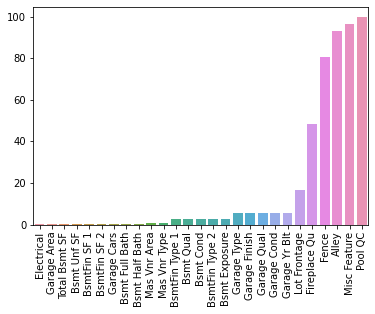

In [12]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [13]:
#We can clearly see that some column have less than 1% of the data as missing ->
#Drop the row or fill the missing value


# And lot of column got most of the data missing -> 
#Drop the feature column all together

In [14]:
#dropping the row with missing values
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'])

In [15]:
#filling the missing data based on the domian knowledge and dec given with the dataset
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

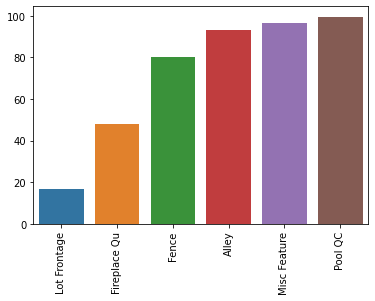

In [16]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
# New updated missing values after add and drop

In [17]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Neighborhood','Lot Frontage'],axis=1)
#Dropping the entire feature column as most of the datapoint is missing

In [18]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [19]:
#finally all the missing value is either filled or deleted 


In [20]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Area          0
Street            0
Lot Shape         0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 73, dtype: int64

In [21]:
#----------END of exp 1 --------------

### 2. Write a program to demonstrate the working of the simple linear regression. Use an appropriate data set for building the best line fit and compute the Mean absolute error, mean squared error, root mean square, and R square value.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"""
Advertising data contain 200 rows of data with 4 columns (3 feature and 1 sale value)
Feature includes:
TV ad-spend amount unit
Radio ad-spend amount unit Newspaper ad-spend amount unit
And a sales column with sale amount unit 
"""

df=pd.read_csv("DATA/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
 #defining the X-features and ylabel
X=df.drop("sales",axis=1)
y=df["sales"]

In [29]:
 #importing scikit-learn train-test split
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# print(len(X_train))
# print(len(X_test))
# print(len(X))
# X_train+X_test should be equal to X

In [31]:
#importing linear regression model algo from sklearn
from sklearn.linear_model import LinearRegression

In [32]:
#creating our own model
my_model=LinearRegression()

In [33]:
#fitting train data to our model
my_model.fit(X_train,y_train)

LinearRegression()

In [34]:
test_prediction=my_model.predict(X_test)

In [40]:
#performance evaluation #MAE and RMSE
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

MAE=mean_absolute_error(y_test,test_prediction)
MSE=mean_squared_error(y_test,test_prediction)
RMSE=np.sqrt(MSE)
print("MAE~ ",MAE)
print("MSE*~ ",MSE)
print("RMSE~ ",RMSE)
print("R-square value~ ",r2_score(y_test,test_prediction))

#high RMSE compared to MAE suggest that there are some outliers with high deviation
#error is +/-
error_percentage = MAE*100/df["sales"].mean()

MAE~  1.4937750024728969
MSE*~  3.7279283306815096
RMSE~  1.9307843822347202
R-square value~  0.8555568430680086


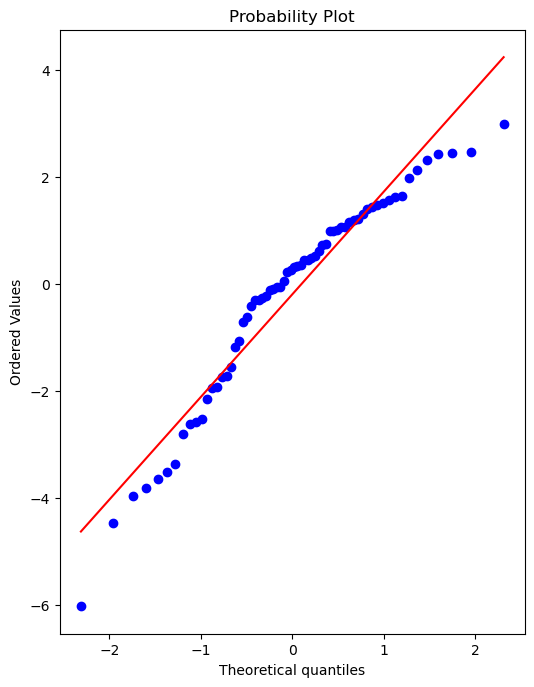

In [42]:
import scipy as sp
test_res = y_test - test_prediction
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

In [43]:
#------End of section 2 --------------

### 3. Implement a logistic regression algorithm and test the algorithm using any data set of your choice from the UCI repository. The output should include Accuracy, Error rate, Precision, and recall rate along with the confusion matrix.

Data description
This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [46]:
#Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('DATA/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
df['target'].unique()

array([1, 0])

<AxesSubplot:xlabel='target', ylabel='count'>

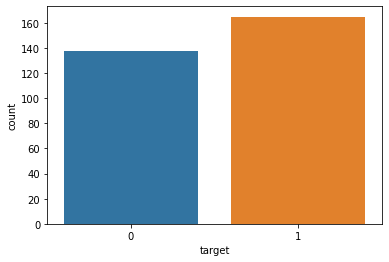

In [54]:
# The output (Target) contain only 2 possible output 0 or 1 . It is a binary classification dataset.
sns.countplot(x='target',data=df)

##### The output is evenly distributed and we can use accuracy as the performance mea sure.

In [56]:
X = df.drop('target',axis=1)
y = df['target']

In [58]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
# We will be using stdscaller for scalling the data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
# 10% of data for test and 90% for training with 101 as random state

In [60]:
 scaler = StandardScaler()

In [62]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegressionCV
# We will be using CV (inbuild crossvalidation logistic reg model to train out data)

In [65]:
log_model = LogisticRegressionCV()

In [66]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [69]:
from sklearn.metrics import plot_confusion_matrix

In [70]:
y_pred = log_model.predict(scaled_X_test)

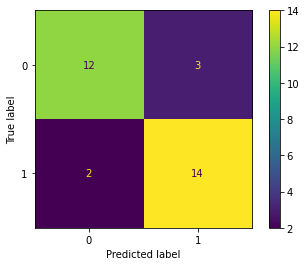

In [71]:
#confusion_matrix
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [72]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [80]:
print("Accuracy_score: ",accuracy_score(y_test,y_pred))
print("Precision_score: ",precision_score(y_test,y_pred))
print("Recall_score: ",recall_score(y_test,y_pred))
print("Error-rate: ",1-accuracy_score(y_test,y_pred))

Accuracy_score:  0.8387096774193549
Precision_score:  0.8235294117647058
Recall_score:  0.875
Error-rate:  0.16129032258064513


In [81]:
#--------End of section 3-----------

### 4. Building a Classifier Using Decision Tree to predict the COVID-19 Severity. Print out the Accuracy, classification error, sensitivity, specificity, precision, and Confusion Matrix of Classification.